In [97]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

os.chdir('/Users/braydennoh/Desktop/segment/moisture/test2/')
calibration = cv2.imread('calibration.jpg')
os.chdir('/Users/braydennoh/Desktop/segment/moisture/test2')
test = cv2.imread('1.jpg')

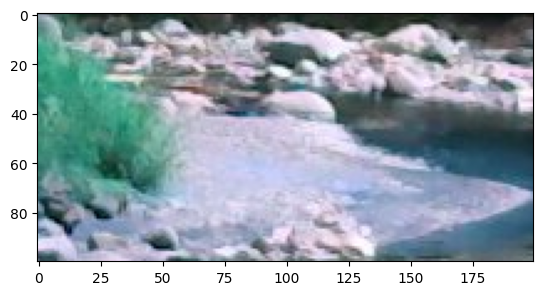

In [99]:
y=400
x=500
h=100
w=200
crop = test[y:y+h, x:x+w]
plt.imshow(crop)

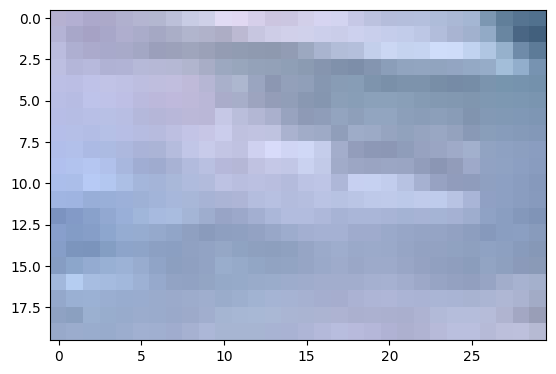

In [100]:
y=60
x=130
h=20
w=30
wetcrop = crop[y:y+h, x:x+w]
plt.imshow(wetcrop)

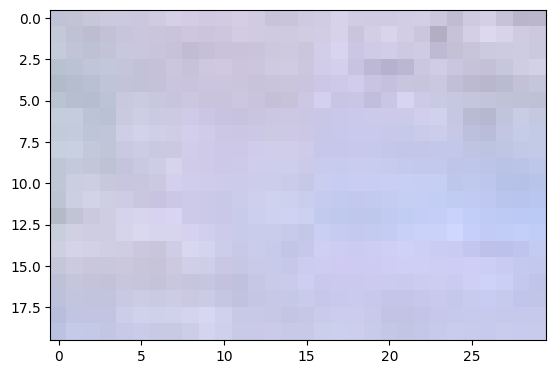

In [101]:
y=50
x=60
h=20
w=30
drycrop = crop[y:y+h, x:x+w]
plt.imshow(drycrop)

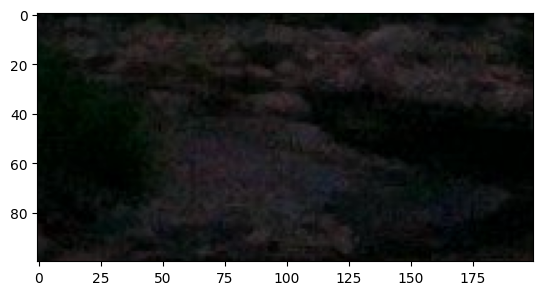

In [102]:
y=400
x=500
h=100
w=200
cropc = calibration[y:y+h, x:x+w]
plt.imshow(cropc)

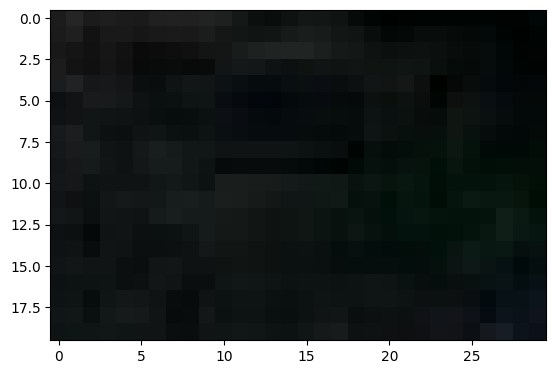

In [103]:
y=60
x=130
h=20
w=30
wetcropc = cropc[y:y+h, x:x+w]
plt.imshow(wetcropc)

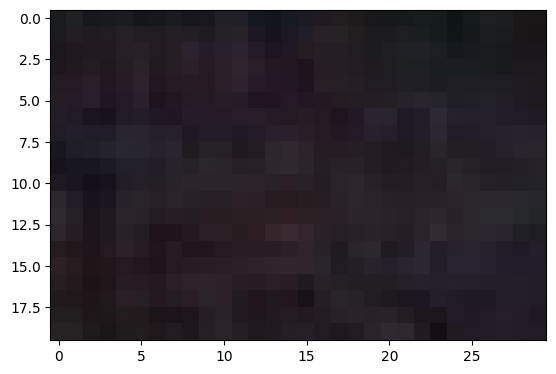

In [104]:
y=50
x=60
h=20
w=30
drycropc = cropc[y:y+h, x:x+w]
plt.imshow(drycropc)

In [105]:
drycrop = cv2.cvtColor(drycrop, cv2.COLOR_RGB2Luv)
wetcrop = cv2.cvtColor(wetcrop, cv2.COLOR_RGB2Luv)
drycropc = cv2.cvtColor(drycrop, cv2.COLOR_RGB2Luv)
wetcropc = cv2.cvtColor(wetcrop, cv2.COLOR_RGB2Luv)


In [106]:
wet = wetcrop-wetcropc
dry = drycrop-drycropc

wet = cv2.cvtColor(wet, cv2.COLOR_BGR2GRAY)
dry = cv2.cvtColor(dry, cv2.COLOR_BGR2GRAY)


In [107]:

import glob
from scipy.stats import skew
skewdry = np.mean(skew(dry, axis=0, bias=True))
skewdry

0.11902465550075957

In [108]:
skewwet = np.mean(skew(wet, axis=0, bias=True))
skewwet

0.228070225614912

0.5724645861955685


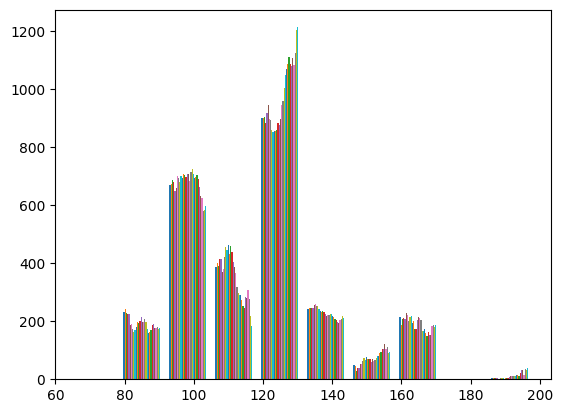

In [125]:
import glob
from scipy.stats import skew
folders = glob.glob('/Users/braydennoh/Desktop/segment/moisture/test2/image')

imagenames_list = []
for folder in folders:
   for f in glob.glob(folder+'/*.jpg'):
       imagenames_list.append(f)

result_arr = []

for image in imagenames_list:           
    img = cv2.imread(image)
    y=400
    x=500
    h=100
    w=200
    crop = img[y:y+h, x:x+w]
    y=60
    x=130
    h=20
    w=30
    wetcrop = crop[y:y+h, x:x+w]
    wetcrop = wetcrop - wetcropc
    wetcrop = cv2.cvtColor(wetcrop, cv2.COLOR_RGB2Luv)
    wetcrop = cv2.cvtColor(wetcrop, cv2.COLOR_BGR2GRAY)
    result_arr.append(wetcrop)

result_arr = np.concatenate(result_arr)
plt.hist(result_arr)
skew = np.mean(skew(result_arr, axis=0, bias=True))
print(skew)    


**Calculating Dry Soil Skewness**

0.6918157082606136


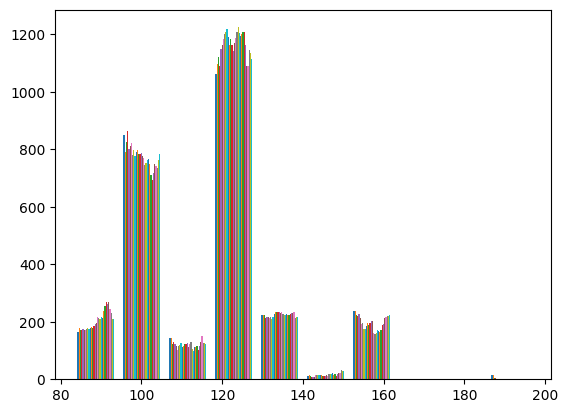

In [126]:
import glob
from scipy.stats import skew
folders = glob.glob('/Users/braydennoh/Desktop/segment/moisture/test2/image')

imagenames_list = []
for folder in folders:
   for f in glob.glob(folder+'/*.jpg'):
       imagenames_list.append(f)

result_arr = []

for image in imagenames_list:           
    img = cv2.imread(image)
    y=400
    x=500
    h=100
    w=200
    crop = img[y:y+h, x:x+w]
    y=50
    x=60
    h=20
    w=30
    drycrop = crop[y:y+h, x:x+w]
    drycrop = drycrop - drycropc
    drycrop = cv2.cvtColor(drycrop, cv2.COLOR_RGB2Luv)
    drycrop = cv2.cvtColor(drycrop, cv2.COLOR_BGR2GRAY)
    result_arr.append(drycrop)

result_arr = np.concatenate(result_arr)
plt.hist(result_arr)
skew = np.mean(skew(result_arr, axis=0, bias=True))
      
print(skew)